In [1]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg

In [3]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
BU_FOLDER = os.path.join(os.path.dirname(CURRENT_FOLDER), "cluster_backup", "gradu_cluster_backup_05042023")
BU_FOLDER2 = os.path.join(os.path.dirname(CURRENT_FOLDER), "cluster_backup", "gradu_cluster_backup_16042023")

In [4]:
linear_regression_results = pd.read_csv(os.path.join(BU_FOLDER2, "logs", "napsu_linear_regression_test_timer.csv"))

In [5]:
# Because header is repeated multiple times, remove the duplicate headers
linear_regression_results = linear_regression_results[linear_regression_results['start'] != 'start']

In [6]:
data_type_dict = {
    'experiment_id': str,
    'start': float,
    'stop': float,
    'timedelta': float,
    'task': str,
    'dataset_name': str,
    'query': object,
    'epsilon': float,
    'delta': float,
    'MCMC_algo': str,
    'laplace_approximation': bool,
    'laplace_approximation_algorithm': str, 
    'query_str': str,
    'query_list': object,
    'missing_query': str,
    'discretization': bool,
    'n_canonical_queries': float,
    'junction_tree_width': float,
    'suff_stat_dim': object,
}

linear_regression_results = linear_regression_results.astype(data_type_dict)

In [7]:
linear_regression_results

,experiment_id,start,stop,timedelta,task,dataset_name,query,epsilon,delta,MCMC_algo,...,query_str,query_list,missing_query,discretization,no_privacy,n_canonical_queries,junction_tree_width,suff_stat_dim,suff_stat,dp_suff_stat
0,6VXEVE4E,2.283924e+06,2.283953e+06,29.715815,Main run,dummy_5x2,[],3.0,1.000000e-08,NUTS,...,nan,NaN,nan,True,NaN,NaN,NaN,NaN,NaN,NaN
1,6VXEVE4E,2.283924e+06,2.283929e+06,4.949003,Query selection,dummy_5x2,NaN,3.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,NaN,NaN,NaN,NaN,NaN
2,6VXEVE4E,2.283929e+06,2.283929e+06,0.000110,Calculating full marginal query,dummy_5x2,NaN,3.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,NaN,NaN,NaN,NaN,NaN
3,6VXEVE4E,2.283929e+06,2.283929e+06,0.008496,Calculating canonical query set,dummy_5x2,NaN,3.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,NaN,NaN,NaN,NaN,NaN
4,6VXEVE4E,2.283929e+06,2.283930e+06,0.652658,Laplace approximation,dummy_5x2,NaN,3.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,9.0,2.0,"(9,)",[2385 2556 2606 2510 2409 2503 2588 2476 2468],[2390.84690271 2553.47395266 2614.65103684 251...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,506HVC3T,2.324004e+06,2.324009e+06,5.102555,Query selection,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,NaN,NaN,NaN,NaN,NaN
4195,506HVC3T,2.324009e+06,2.324009e+06,0.000454,Calculating full marginal query,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,NaN,NaN,NaN,NaN,NaN
4196,506HVC3T,2.324009e+06,2.324010e+06,0.015298,Calculating canonical query set,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,NaN,NaN,NaN,NaN,NaN
4197,506HVC3T,2.324010e+06,2.324054e+06,43.871450,Laplace approximation,dummy_5x7,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,174.0,3.0,"(174,)",[279 279 257 251 316 137 285 278 291 282 273 1...,[ 4.20210844e+02 2.83385742e+02 2.72596654e+...


In [9]:
MCMC_rows = linear_regression_results[linear_regression_results['task'] == 'MCMC']

In [10]:
MCMC_rows.sort_values(["dataset_name", "epsilon"])

,experiment_id,start,stop,timedelta,task,dataset_name,query,epsilon,delta,MCMC_algo,...,query_str,query_list,missing_query,discretization,no_privacy,n_canonical_queries,junction_tree_width,suff_stat_dim,suff_stat,dp_suff_stat
180,FDY0Q6KE,2.290468e+06,2.290489e+06,20.194214,MCMC,dummy_5x2,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,9.0,3.0,"(9,)",[2579 2437 2567 2549 2464 2624 2482 2635 2426],[2590.24589234 2368.41414955 2714.59724607 241...
369,7R02DD18,2.297915e+06,2.297937e+06,22.167480,MCMC,dummy_5x2,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,9.0,2.0,"(9,)",[2472 2497 2473 2658 2452 2590 2429 2526 2543],[2570.29645985 2214.09321873 2276.04727658 258...
432,9PE9DHAX,2.299301e+06,2.299323e+06,22.286440,MCMC,dummy_5x2,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,9.0,1.0,"(9,)",[2519 2514 2497 2528 2490 2445 2497 2533 2443],[2532.57113523 2582.00229678 2708.90803346 239...
453,QPAJTQXQ,2.300807e+06,2.300831e+06,23.640537,MCMC,dummy_5x2,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,9.0,1.0,"(9,)",[2463 2524 2502 2463 2500 2489 2484 2457 2586],[2346.85339378 2566.2446609 2466.31436975 257...
565,794ERI3H,2.302446e+06,2.302469e+06,22.780257,MCMC,dummy_5x2,NaN,0.1,1.000000e-08,NUTS,...,empty,[],nan,True,False,9.0,3.0,"(9,)",[2511 2526 2487 2445 2529 2504 2472 2532 2453],[2520.97515843 2453.96857042 2481.36178722 240...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,XTPOEJ6E,2.330267e+06,2.332956e+06,2688.802389,MCMC,dummy_5x7,NaN,8.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,174.0,2.0,"(174,)",[301 287 271 258 272 141 306 284 267 243 281 1...,[303.27190058 285.31096038 269.28654649 258.79...
3148,ZJYFKY3G,2.332811e+06,2.335429e+06,2618.060016,MCMC,dummy_5x7,NaN,8.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,174.0,2.0,"(174,)",[266 263 290 253 272 152 294 268 300 281 303 1...,[259.94439388 262.18478666 290.758959 253.00...
3197,KJ960COK,2.333073e+06,2.335632e+06,2559.223032,MCMC,dummy_5x7,NaN,8.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,174.0,1.0,"(174,)",[306 285 273 244 271 138 279 285 263 294 259 1...,[307.23518556 281.03880611 273.38473249 244.36...
3876,8SGXJOMX,2.339093e+06,2.341456e+06,2363.211005,MCMC,dummy_5x7,NaN,8.0,1.000000e-08,NUTS,...,empty,[],nan,True,False,174.0,3.0,"(174,)",[241 308 287 274 278 117 315 253 301 275 278 1...,[239.23339585 306.86120743 286.24104678 272.15...


[]

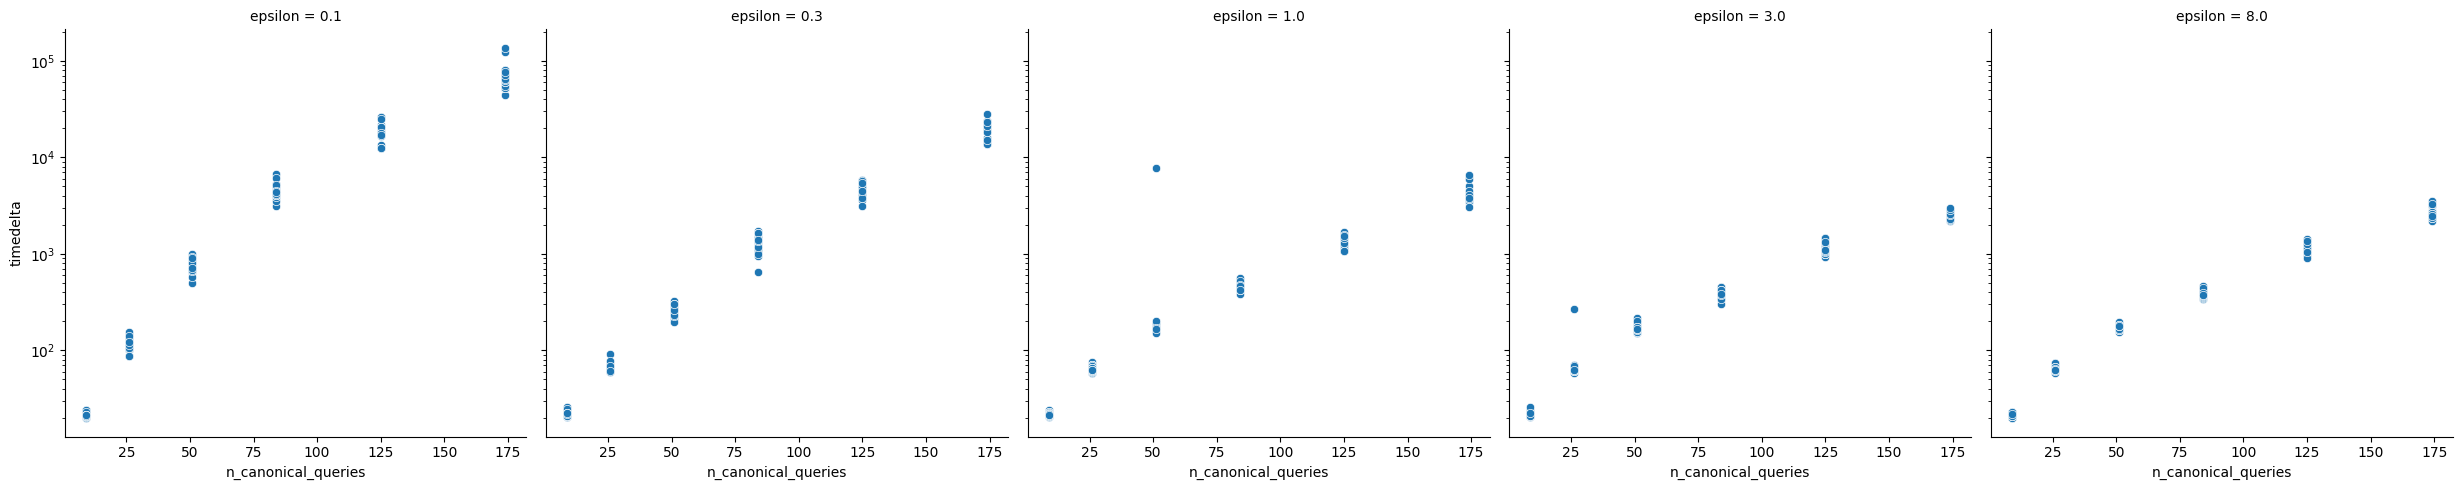

In [11]:
sns.relplot(
    data=MCMC_rows,
    x="n_canonical_queries", y="timedelta", col="epsilon",
)
plt.yscale("log")
plt.plot()

[]

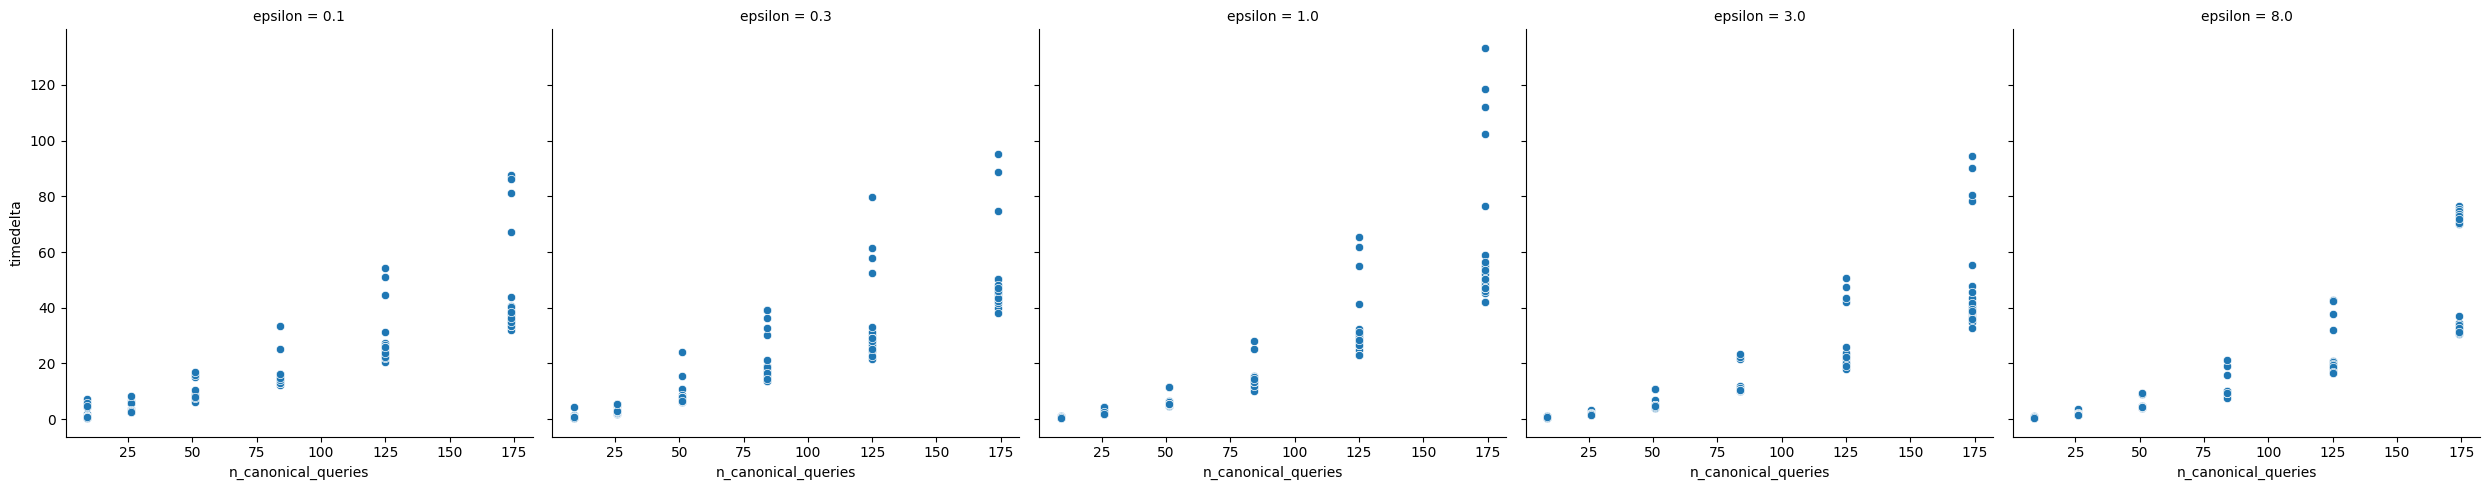

In [13]:
LA_rows = linear_regression_results[linear_regression_results['task'] == 'Laplace approximation']
sns.relplot(
    data=LA_rows,
    x="n_canonical_queries", y="timedelta", col="epsilon",
)

plt.plot()

In [13]:
n = 600
x = MCMC_rows['n_canonical_queries'].to_numpy()
y = MCMC_rows['epsilon'].to_numpy()
Z = MCMC_rows['timedelta'].to_numpy()

degree = 3

A = []

for i in range(n):
    A.append([])
    for xd in range(degree+1):
        for yd in range(degree+1-xd):
            A[i].append((x[i]**xd)*(y[i]**yd))            

c,_,_,_ = linalg.lstsq(A,Z)

j = 0

for xd in range(0,degree+1):
    for yd in range(0,degree+1-xd):
        print(f" + ({c[j]}) x^ {xd} y^ {yd}")
        j += 1

 + (2592.428417876128) x^ 0 y^ 0
 + (-12046.64677378092) x^ 0 y^ 1
 + (6341.825366096461) x^ 0 y^ 2
 + (-617.5903372614314) x^ 0 y^ 3
 + (19.01066874615973) x^ 1 y^ 0
 + (-81.39213330088423) x^ 1 y^ 1
 + (12.930846765216945) x^ 1 y^ 2
 + (0.2969965522249866) x^ 2 y^ 0
 + (-0.2774298458697133) x^ 2 y^ 1
 + (0.005689786265370467) x^ 3 y^ 0


In [ ]:
def runtime_estimation_function(n_canonical_queries, epsilon):
    result = 3272.8513081068527 + 
    -15513.186768508473*epsilon + 
    8154.979581595167*(epsilon**2) + 
    -793.8353478725403*(epsilon**3) + 
    31.977790561866836*n_canonical_queries + 
    -101.97188005090729*n_canonical_queries*epsilon + 
    16.230331543572248*n_canonical_queries*(epsilon**2) + 
    0.1682323506139619*(n_canonical_queries**2) + 
    -0.33833026643051833*(n_canonical_queries**2)*epsilon + 
    0.00762688551925114*(n_canonical_queries**3)
    return 3272.8513081068527 + -15513.186768508473*epsilon + 8154.979581595167*(epsilon**2) + -793.8353478725403*(epsilon**3) + 31.977790561866836*n_canonical_queries + -101.97188005090729*n_canonical_queries*epsilon + 16.230331543572248*n_canonical_queries*(epsilon**2) + 0.1682323506139619*(n_canonical_queries**2) + -0.33833026643051833*(n_canonical_queries**2)*epsilon + 0.00762688551925114*(n_canonical_queries**3)

In [84]:
MCMC_rows['runtime_estimation'] = MCMC_rows.apply(lambda x: runtime_estimation_function(x['n_canonical_queries'], x['epsilon']), axis=1)

/tmp/ipykernel_1482055/3541534656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MCMC_rows['runtime_estimation'] = MCMC_rows.apply(lambda x: runtime_estimation_function(x['n_canonical_queries'], x['epsilon']), axis=1)


In [85]:
MCMC_rows

,experiment_id,start,stop,timedelta,task,dataset_name,query,epsilon,delta,MCMC_algo,laplace_approximation,laplace_approximation_algorithm,query_str,query_list,missing_query,discretization,n_canonical_queries,junction_tree_width,suff_stat_dim,runtime_estimation
5,V4ULPDFD,1.383229e+06,1.383261e+06,31.263832,MCMC,dummy_5x2,NaN,0.3,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,9.0,3.0,"(9,)",-632.002113
12,ZQM99RBQ,1.383268e+06,1.383294e+06,25.969453,MCMC,dummy_5x2,NaN,3.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,9.0,1.0,"(9,)",7480.741618
19,JEFBHZF0,1.383266e+06,1.383295e+06,29.504196,MCMC,dummy_5x2,NaN,1.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,9.0,2.0,"(9,)",-5371.282980
26,VUZSN0ID,1.383276e+06,1.383302e+06,26.128632,MCMC,dummy_5x2,NaN,0.1,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,9.0,3.0,"(9,)",2016.221089
33,JALY4KLB,1.383258e+06,1.383322e+06,64.414908,MCMC,dummy_5x3,NaN,8.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,26.0,3.0,"(26,)",-311.019408
40,GVTRS6VY,1.383277e+06,1.383338e+06,61.182982,MCMC,dummy_5x3,NaN,1.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,26.0,2.0,"(26,)",-6257.984984
47,AXODXMM1,1.383276e+06,1.383422e+06,146.071826,MCMC,dummy_5x3,NaN,0.1,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,26.0,3.0,"(26,)",2597.708227
54,SEUSX56W,1.383282e+06,1.383506e+06,223.332988,MCMC,dummy_5x4,NaN,8.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,51.0,1.0,"(51,)",2053.804839
61,2GMFCDCA,1.383398e+06,1.383550e+06,152.502921,MCMC,dummy_5x4,NaN,3.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,51.0,2.0,"(51,)",982.739960
68,Q8JHNKI9,1.383282e+06,1.383661e+06,379.142298,MCMC,dummy_5x5,NaN,8.0,1.000000e-08,NUTS,True,torch_LBFGS,empty,[],nan,True,84.0,1.0,"(84,)",2667.111804


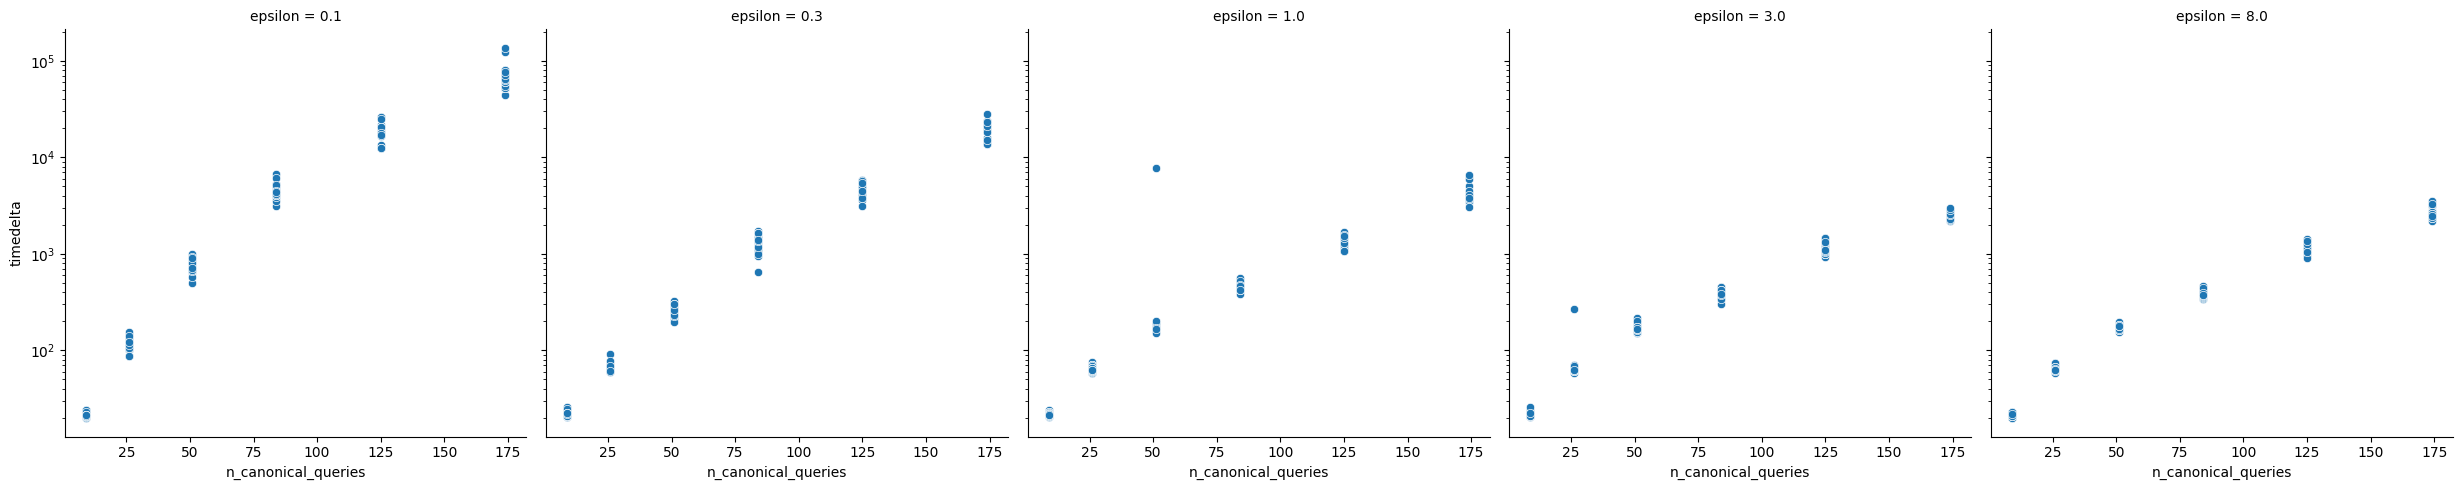

In [12]:
g = sns.relplot(
    data=MCMC_rows,
    x="n_canonical_queries", y="timedelta", col="epsilon",
)

plt.yscale("log")

plt.plot()
g.savefig("linear_regression_plot.png")